In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Attribute

We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class


Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical) - age in years

2.Blood Pressure(numerical) - bp in mm/Hg

3.Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal) - al - (0,1,2,3,4,5) g/dl

5.Sugar(nominal) - su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal) - rbc - (normal,abnormal)

7.Pus Cell (nominal) - pc - (normal,abnormal)

8.Pus Cell clumps(nominal) - pcc - (present,notpresent)

9.Bacteria(nominal) - ba - (present,notpresent)

10.Blood Glucose Random(numerical) - bgr in mgs/dl

11.Blood Urea(numerical) - bu in mgs/dl

12.Serum Creatinine(numerical) - sc in mgs/dl(miligram/deciliter)

13.Sodium(numerical) - sod in mEq/L

14.Potassium(numerical) - pot in mEq/L

15.Hemoglobin(numerical) - hemo in gms/deciliter

16.Packed Cell Volume(numerical) - pcv

17.White Blood Cell Count(numerical) - wc in cells/cumm

18.Red Blood Cell Count(numerical) - rc in millions/cmm(cubic millimeter)

19.Hypertension(nominal) - htn - (yes,no)

20.Diabetes Mellitus(nominal) - dm - (yes,no)

21.Coronary Artery Disease(nominal) - cad - (yes,no)

22.Appetite(nominal) - appet - (good,poor)

23.Pedal Edema(nominal) - pe - (yes,no)

24.Anemia(nominal) - ane - (yes,no)

25.Class (nominal) - class - (ckd,notckd)

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import style

import keras as k
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score
from keras.layers import Dense

In [ ]:
kidney_disease = 'drive/My Drive/kidney_disease.csv'
df = pd.read_csv(kidney_disease)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 25)

In [ ]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filing 9 NAN indices of 'age' col with its average value

In [ ]:
avgage = round(df['age'].mean(), 2)
df['age'].fillna(avgage, inplace=True)
df.isna().sum()

age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Similarly filing 12 NAN indices of 'bp' col with its average value

In [ ]:
avgbp = round(df['bp'].mean(), 2)
df['bp'].fillna(avgbp, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filing 47 NAN indices of 'sg' col with its average value

In [ ]:
avgsg = round(df['sg'].mean(), 2)
df['sg'].fillna(avgsg, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filing 46 NAN indices of 'al' col with its average value

In [ ]:
avgal = round(df['al'].mean(), 2)
df['al'].fillna(avgal, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filing 49 NAN indices of 'su' col with its average value

In [ ]:
avgsu = round(df['su'].mean(), 2)
df['su'].fillna(avgsu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Dropping less important feature

In [ ]:
df.drop(['pc', 'pcc', 'ba', 'rbc'], axis=1, inplace=True)

In [ ]:
df.shape

(400, 21)

In [ ]:
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Let's fill again 44 NAN indices of numeric 'bgr' col with its average value

In [ ]:
avgbgr = round(df['bgr'].mean(), 2)
df['bgr'].fillna(avgbgr, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filling 19 NAN indices of col 'bu' with its average value

In [ ]:
avgbu = round(df['bu'].mean(), 2)
df['bu'].fillna(avgbu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filling 17 NAN indices of col 'sc' with its average value

In [ ]:
avgsc = round(df['sc'].mean(), 2)
df['sc'].fillna(avgsc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filling 87 NAN indices of col 'sod' with its average value

In [ ]:
avgsod = round(df['sod'].mean(), 2)
df['sod'].fillna(avgsod, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filling 88 NAN indices of col 'pot' with its average value

In [ ]:
avgpot = round(df['pot'].mean(), 2)
df['pot'].fillna(avgpot, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

filling 52 NAN indices of col 'hemo' with its average value

In [ ]:
avghemo = round(df['hemo'].mean(), 2)
df['hemo'].fillna(avghemo, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df['pcv'].replace('\t?', '0', inplace=True)
df['pcv'].replace('\t43', '43', inplace=True)

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [ ]:
df['pcv'].dtypes

dtype('O')

In [ ]:
df['pcv'] = df['pcv'].astype(float)

In [ ]:
df['pcv'].dtypes

dtype('float64')

In [ ]:
df['pcv'].isna().sum()

70

Now, filling 70 NAN indices of col 'pcv' with its average value

In [ ]:
avgpcv = round(df['pcv'].mean(), 2)
df['pcv'].fillna(avgpcv, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 38.77, 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  ,  0.  , 52.  , 14.  , 22.  , 18.  , 42.  , 17.  ,
       46.  , 23.  , 19.  , 25.  , 41.  , 26.  , 15.  , 21.  , 43.  ,
       20.  , 47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [ ]:
df['pcv'].replace(0, avgpcv, inplace=True)

In [ ]:
df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 38.77, 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  , 52.  , 14.  , 22.  , 18.  , 42.  , 17.  , 46.  ,
       23.  , 19.  , 25.  , 41.  , 26.  , 15.  , 21.  , 43.  , 20.  ,
       47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc'].replace("\t?", "0", inplace=True)

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '0', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc'].replace("\t6200", "6200", inplace=True)
df['wc'].replace("\t8400", "8400", inplace=True)

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '0', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [ ]:
df['wc'].dtypes

dtype('O')

In [ ]:
df['wc'] = df['wc'].astype(float)

In [ ]:
df['wc'].dtypes

dtype('float64')

Again, filling 105 NAN indices of col 'wc' with its average value

In [ ]:
avgwc = round(df['wc'].mean(), 2)
df['wc'].fillna(avgwc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  ,     0.  , 12300.  , 16700.  ,  2600.  ,
       26400.  ,  8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  ,
       15700.  ,  4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,
        9900.  ,  5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100

In [ ]:
df['wc'].replace(0, avgwc, inplace=True)

In [ ]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  , 12300.  , 16700.  ,  2600.  , 26400.  ,
        8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  , 15700.  ,
        4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,  9900.  ,
        5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100.  ,  6600

In [ ]:
df['wc'].dtypes

dtype('float64')

In [ ]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [ ]:
df['rc'].replace('\t?', '0', inplace=True)

In [ ]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '0', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [ ]:
df['rc'].dtypes

dtype('O')

In [ ]:
df['rc'] = df['rc'].astype(float)

In [ ]:
df['rc'].dtypes

dtype('float64')

Now, filling 130 NAN indices of col 'rc' with its average value

In [ ]:
avgrc = round(df['rc'].mean(), 2)
df['rc'].fillna(avgrc, inplace=True)
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [ ]:
df['rc'].unique()

array([5.2 , 4.69, 3.9 , 4.6 , 4.4 , 5.  , 4.  , 3.7 , 3.8 , 3.4 , 2.6 ,
       2.8 , 4.3 , 3.2 , 3.6 , 4.1 , 4.9 , 2.5 , 4.2 , 4.5 , 3.1 , 4.7 ,
       3.5 , 6.  , 2.1 , 5.6 , 2.3 , 2.9 , 2.7 , 8.  , 3.3 , 3.  , 2.4 ,
       4.8 , 0.  , 5.4 , 6.1 , 6.2 , 6.3 , 5.1 , 5.8 , 5.5 , 5.3 , 6.4 ,
       5.7 , 5.9 , 6.5 ])

In [ ]:
df['rc'].replace(0, avgrc, inplace=True)

Here remaining 'cad', 'appet', 'pe', 'ane' that are less significant to our accuracy. we drop them.

In [ ]:
df.drop([ 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True)

In [ ]:
df.shape

(400, 17)

In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
df['classification'].replace('ckd\t', 'ckd', inplace=True)

In [ ]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

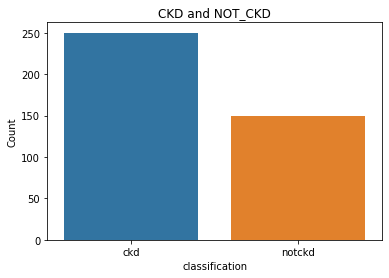

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("CKD and NOT_CKD")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']== 'ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']== 'notckd'])/len(df['classification'])*100,2),"%")

Store Clean data in csv file

In [ ]:
df.to_csv('cleanedckddata.csv', index = False, encoding='utf-8')

Transform data to numeric - normalization

Converting Categorical 'classification' col to Numeric value

if ckd then output is 1 - and if not ckd then output is 0

if htn then output is 1 - and if not htn then output is 0

if dm then output is 1 - and if not dm then output is 0

In [ ]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,yes,yes,ckd
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,yes,no,ckd
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,no,no,ckd


In [ ]:
df['classification'] = np.where(df['classification']=='ckd', 1, 0)
df['htn'] = np.where(df['htn']=='yes', 1, 0)
df['dm'] = np.where(df['dm']=='yes', 1, 0)

In [ ]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1,1,1
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             400 non-null    int64  
 15  dm              400 non-null    int64  
 16  classification  400 non-null    int64  
dtypes: float64(14), int64(3)
memory usa

In [ ]:
df.shape

(400, 17)

In [ ]:
df.isna().any()

age               False
bp                False
sg                False
al                False
su                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
classification    False
dtype: bool

In [ ]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
classification    0
dtype: int64

get correlations of each features in dataset

plot heat map

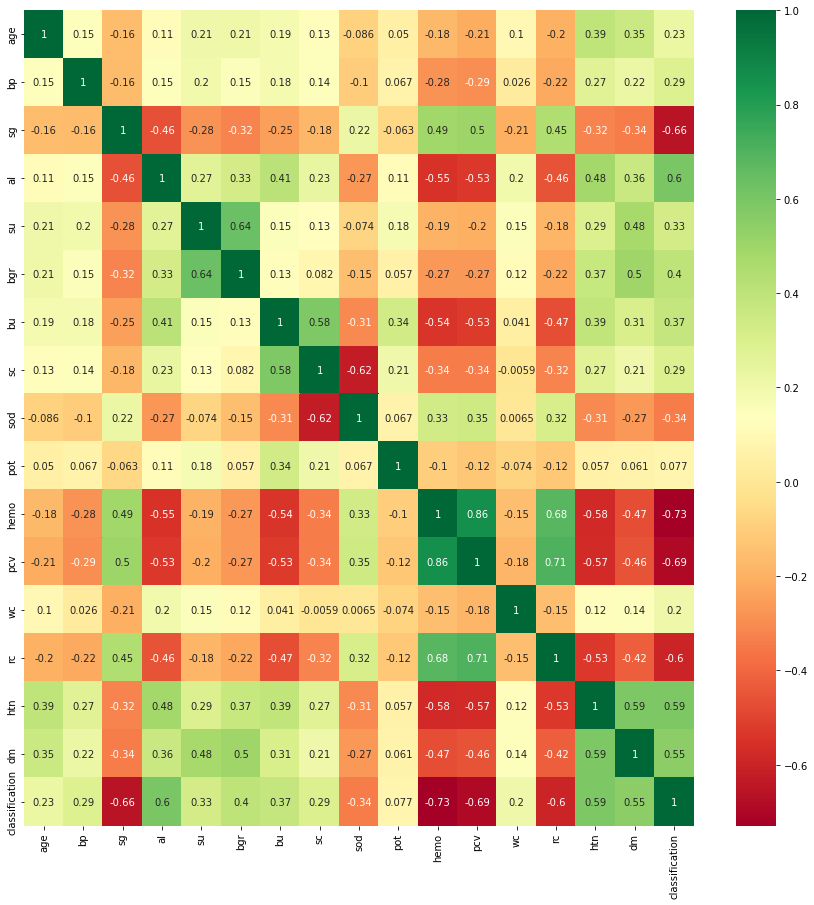

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

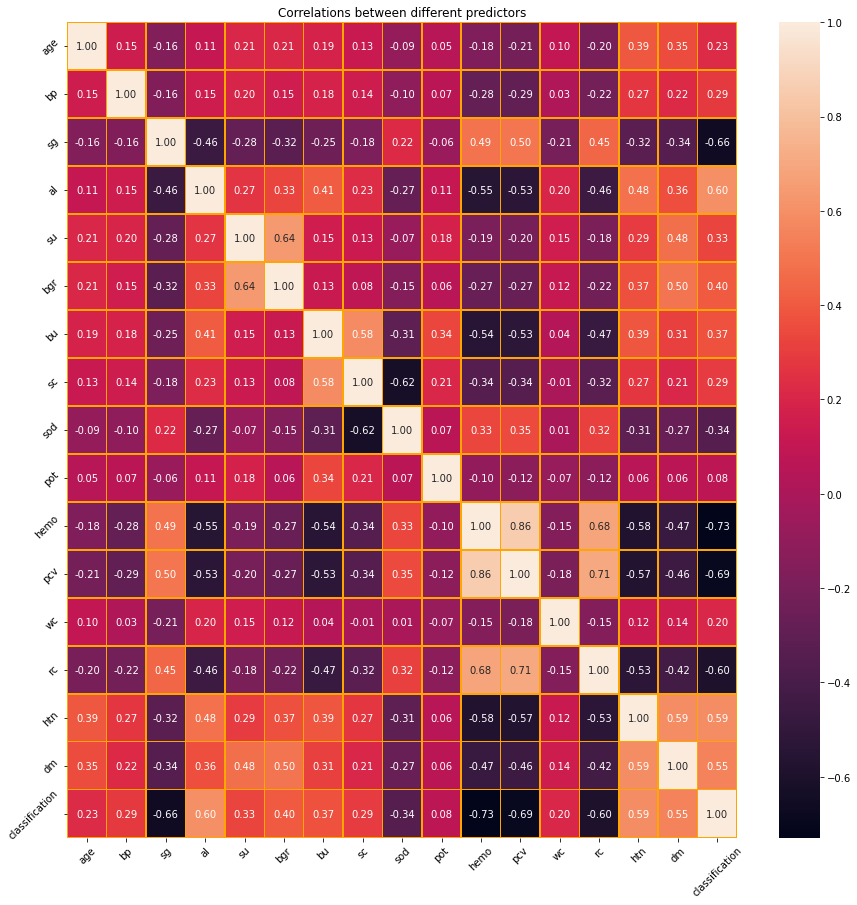

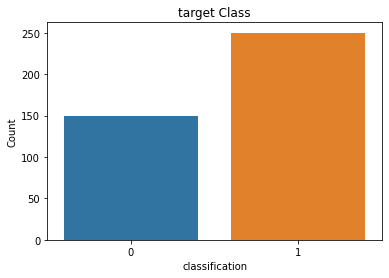

In [ ]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

Checking data distributions between some highly correlated columns

array([1, 0])

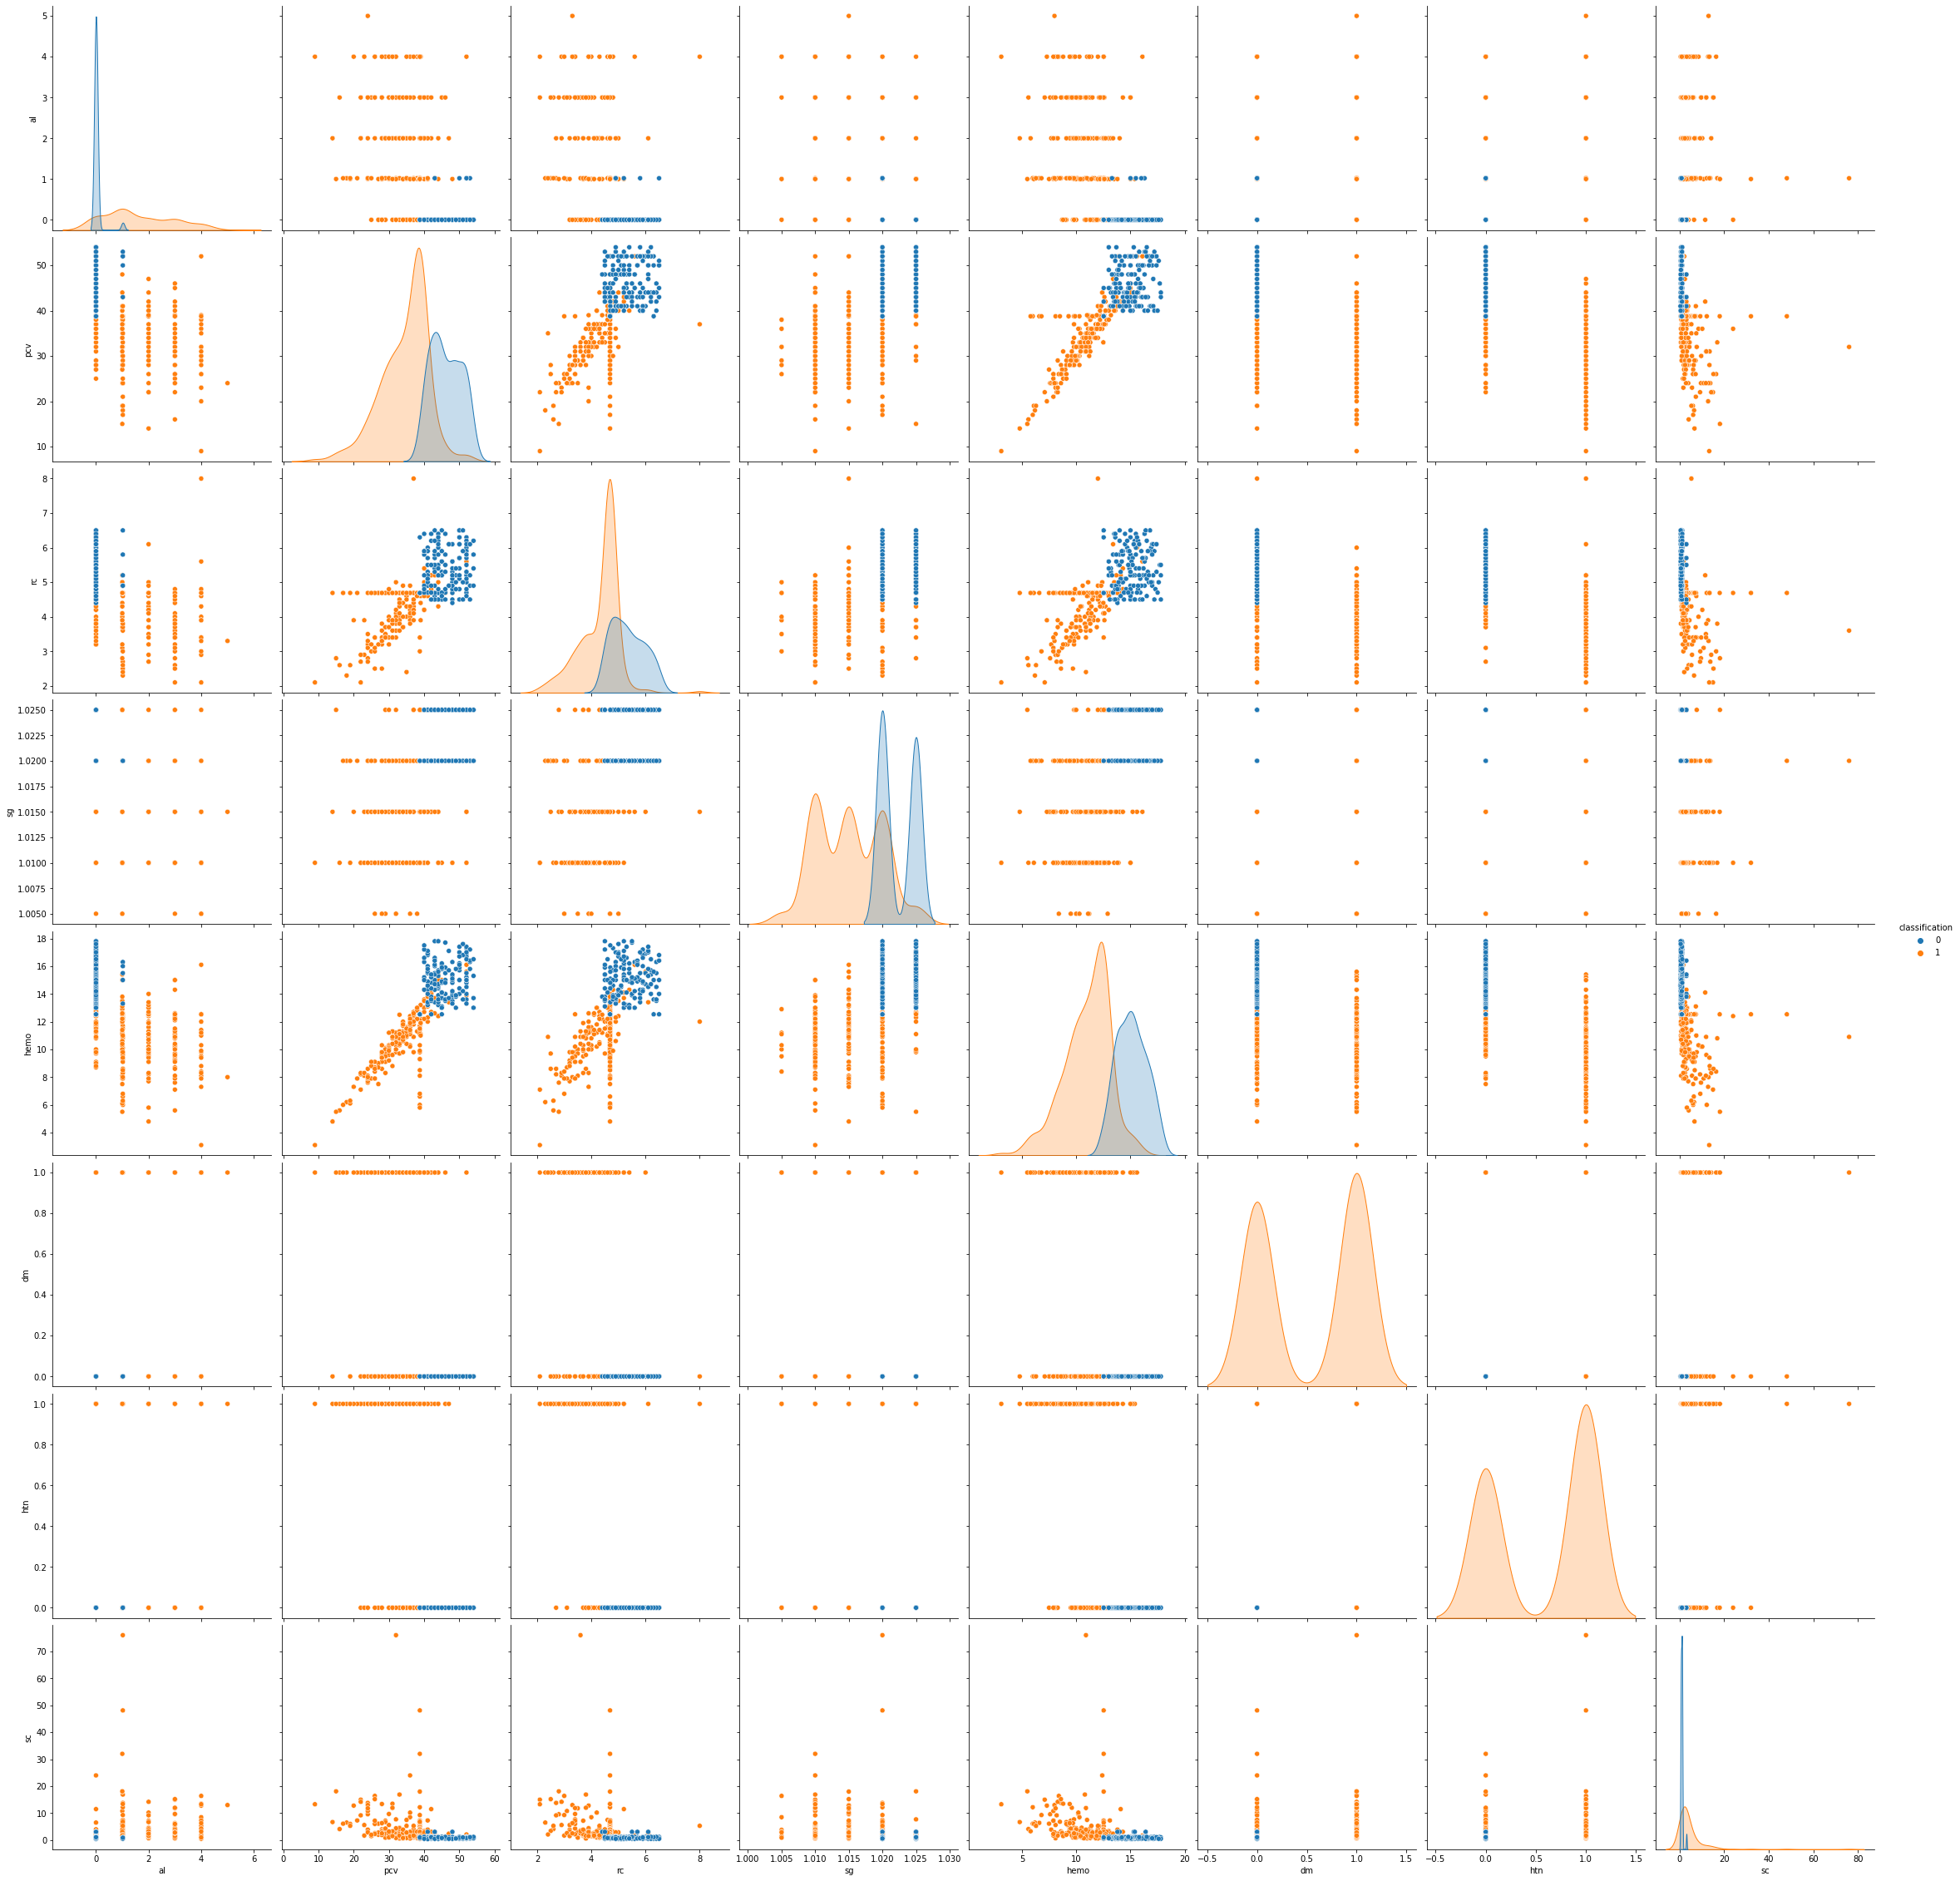

In [ ]:
sns.pairplot(df[['al', 'pcv', 'rc', 'sg', 'hemo', 'dm', 'htn', 'sc', 'classification']], hue='classification', height=4)

df['classification'].unique()

create  a list of  the col name to keep based on correlation

In [ ]:
columns_to_retain =  ['sg', 'al', 'rc', 'sc', 'su', 'dm', 'hemo', 'pcv', 'htn', 'classification']

now we have to create a new data set  without any other column except the column that we want to retain

drop the columns that are not in columns to retain

Drop the columns that are not in columns_2_retain. and create a new dataset

In [ ]:
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values
df= df.dropna(axis = 0)

In [ ]:
df.head()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
0,1.020,1.0,0.0,1.2,15.4,44.0,5.20,1,1,1
1,1.020,4.0,0.0,0.8,11.3,38.0,4.69,0,0,1
2,1.010,2.0,3.0,1.8,9.6,31.0,4.69,0,1,1
3,1.005,4.0,0.0,3.8,11.2,32.0,3.90,1,0,1
4,1.010,2.0,0.0,1.4,11.6,35.0,4.60,0,0,1


In [ ]:
df.describe()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.017712,1.017300,0.450125,3.07235,12.526900,38.864175,4.701725,0.367500,0.335000,0.625000
std,0.005434,1.272318,1.029487,5.61749,2.716171,8.151199,0.840354,0.482728,0.472582,0.484729
min,1.005000,0.000000,0.000000,0.40000,3.100000,9.000000,2.100000,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.000000,0.90000,10.875000,34.000000,4.500000,0.000000,0.000000,0.000000
50%,1.020000,1.000000,0.000000,1.40000,12.530000,38.770000,4.690000,0.000000,0.000000,1.000000
75%,1.020000,2.000000,0.450000,3.07000,14.625000,44.000000,5.100000,1.000000,1.000000,1.000000
max,1.025000,5.000000,5.000000,76.00000,17.800000,54.000000,8.000000,1.000000,1.000000,1.000000


data visualisation in histogram

to check the distribution of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0ad6d38b0>,
      dtype=object)

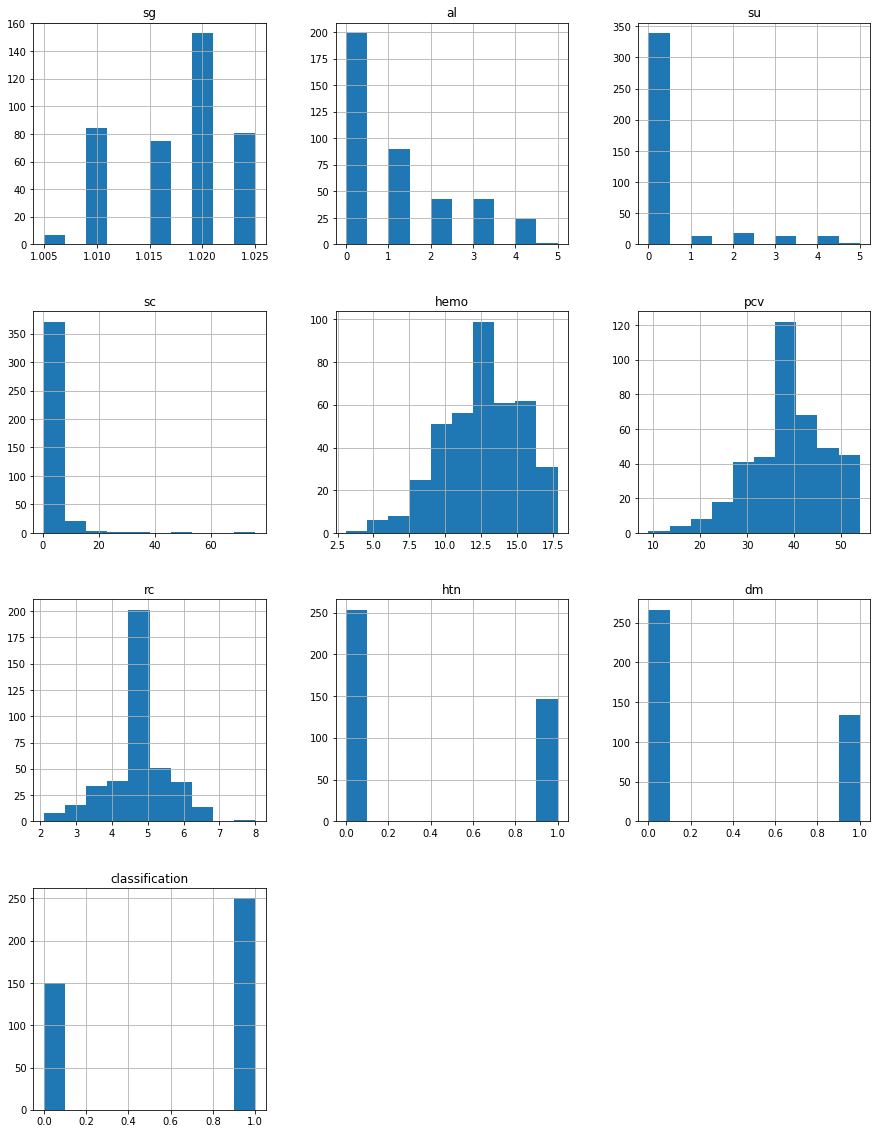

In [ ]:
df.hist(figsize = (15,20))

#Observations:
    1.hemo looks a bit left skewed
    2.pcv is left skewed
    3.bpis also a bit right skewed
    4.Rest of the features are lightly skewed

correlation

In [ ]:
df[["htn", "classification"]].corr()

df[["dm", "classification"]].corr()

,dm,classification
dm,1.000000,0.549778
classification,0.549778,1.000000


(0.0, 1.0500000000000016)

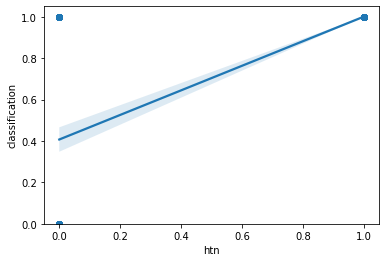

In [ ]:
sns.regplot(x="htn", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.050000000000002)

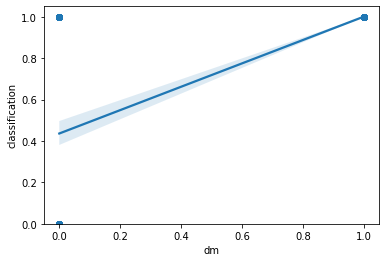

In [ ]:
sns.regplot(x="dm", y="classification", data=df)
plt.ylim(0,)

(0.0, 2.075065889421976)

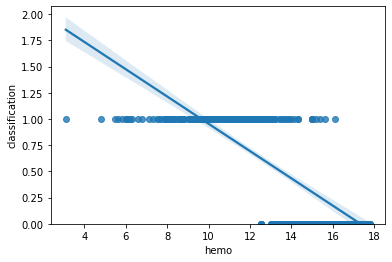

In [ ]:
sns.regplot(x="hemo", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.7134434230451745)

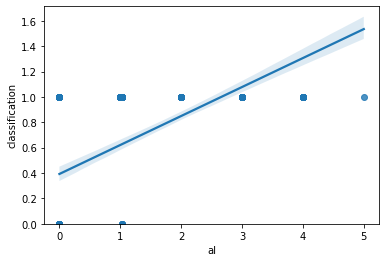

In [ ]:
sns.regplot(x="al", y="classification", data=df)
plt.ylim(0,)

(0.0, 5.547927899444825)

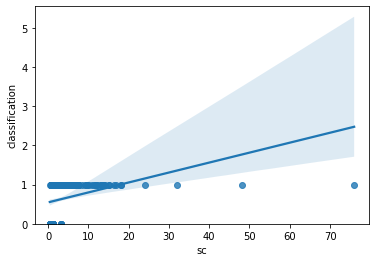

In [ ]:
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.500466528470182)

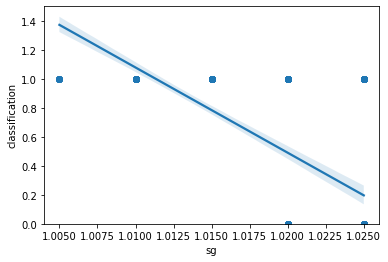

In [ ]:
sns.regplot(x="sg", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.5064176577199946)

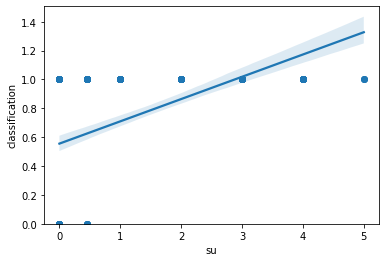

In [ ]:
sns.regplot(x="su", y="classification", data=df)
plt.ylim(0,)

(0.0, 1.7616526016700553)

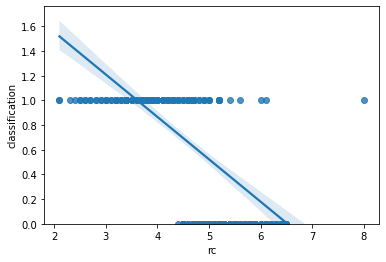

In [ ]:
sns.regplot(x="rc", y="classification", data=df)
plt.ylim(0,)

#Features Selected

Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

Albumin(nominal) - al - (0,1,2,3,4,5) g/dl

Red Blood Cell Count(numerical) - rc in millions/cmm(cubic millimeter)

Serum Creatinine(numerical) - sc in mgs/dl(miligram/deciliter)

Sugar(nominal) - su - (0,1,2,3,4,5)

Diabetes Mellitus(nominal) - dm - (yes,no)

Hemoglobin(numerical) - hemo in gms/deciliter

Packed Cell Volume(numerical) - pcv

Hypertension(nominal) - htn - (yes,no)

classification - ckd or notckd

split the data into independent (x) data set (the features) and dependent (y) dataset (the target)

In [ ]:
#to drop the column  classification
X = df.drop(['classification'], axis = 1)

In [ ]:
#it contains all target that we want
y= df['classification']

#feature scaling
Scaling data to standard deviation range to reduce computing and increase model performence

min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

X.shape

(400, 9)

Data split into 80% training and 20% testing and shuffle

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

defining dependent y

In [ ]:
y = df.iloc[:, -1]

In [ ]:
y.head(3)

0    1
1    1
2    1
Name: classification, dtype: int64

printing the shape of the new x objects

In [ ]:
print (X_train.shape)
print (X_test.shape)

(320, 9)
(80, 9)


printing the shape of the new y objects

In [ ]:
print (y_train.shape)
print (y_test.shape)

(320,)
(80,)


#Model Building
Multilayer Perceptron (MLP)

build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset

In [ ]:
mlp = Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not

loss fn measures how well the model does the training

optimizer =adam

In [ ]:
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

#train the model

epochs is the number of genration over the entire data set to train on

batch size is the number of several graidient for training

In [ ]:
history = mlp.fit(X_train, y_train, epochs = (200), batch_size = X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 1s 944ms/step - loss: 0.7043 - accuracy: 0.1562
Epoch 2/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6943 - accuracy: 0.4563
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 0.6846 - accuracy: 0.6281
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6750 - accuracy: 0.6313
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6657 - accuracy: 0.6313
Epoch 6/200
1/1 [==============================] - 0s 16ms/step - loss: 0.6566 - accuracy: 0.6313
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6478 - accuracy: 0.6344
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6392 - accuracy: 0.6750
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 0.6308 - accuracy: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 18ms/step - loss: 0.6226 - accuracy: 0.7844
Epoch 11/200
1/1 [

In [ ]:
#save the model
mlp.save('ckd.model')

visualise the model loss and accuracy

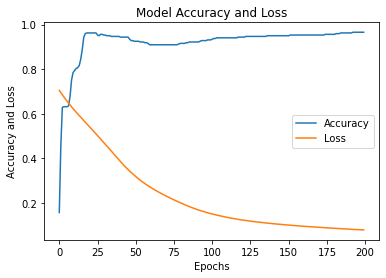

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

to check if the patient has ckd or not

get the shape of the training and the testing data

In [ ]:
print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

shape of the training data: (320, 9)
shape of the test data (80, 9)


to see how the model preidcts and diagnos patients

In [ ]:
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

3/3 [==============================] - 0s 4ms/step


[1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

show the actual values. if the patient actually has ckd or not

In [ ]:
y_test

127    1
121    1
347    0
63     1
317    0
      ..
98     1
349    0
232    1
66     1
41     1
Name: classification, Length: 80, dtype: int64

In [ ]:
y.value_counts()

1    250
0    150
Name: classification, dtype: int64

among 400 cases in the dataset 250 cases are ckd, and 150 cases are not ckd

converting y to numpy 1D array

show the actual and predicted values side by side

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

Original: 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1
Predicted: 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1


In [ ]:
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

Multi Layer Perceptron Model Accuracy: 98.75%


#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in knn_pred)))

# Checking Model prediction accuracy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

Original: 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1
Predicted: 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1
KNN Accuracy 97.5%


# Randdom Forest (RF)

In [ ]:
rf = RandomForestClassifier(max_depth=20, n_estimators=21)
rf.fit(X_train, y_train)
RandomForestClassifier(max_depth=20, n_estimators=21)
rf_pred = rf.predict(X_test)

#Tuning Model Accuracy using Cross Validation and n_estimators
rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

Random Forest Accuracy: 100.0%


# Support Vector Classifier

In [ ]:
svc = SVC(C=1.5)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

clf= svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
clf.score(X_test, y_test)

clf.score(X_train, y_train) #cross validation

svc_pred = svc.predict(X_test)

svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

SVM Accuracy: 97.5%


# Gussian Naive Bayes (GNB)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)
gnb_pred

gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, 2)
print(f'GNB Model Accuracy: {gnb_acc}%')

GNB Model Accuracy: 92.5%


#Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

Decision Tree Classifier Accuracy: 100.0%


#logistics Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 97.5%


#model comparison

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'GNB', 'MLP', 'SVM', 'Logistics Regression' ],
    'Score' : [ dtc_acc, rf_acc, knn_acc, gnb_acc, mlp_acc, svc_acc, logreg_acc ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision Tree Classifier,100.00
1,Random Forest Classifier,100.00
4,MLP,98.75
2,KNN,97.50
5,SVM,97.50
6,Logistics Regression,97.50
3,GNB,92.50
